In [1]:
import sys
sys.path.insert(0, "/Users/bengieru/Neuronal_Cascades/Simplicial_Model")


from Neuronal_Cascades_base import neuron
from Neuronal_Cascades_base import Geometric_Brain_Network

from scipy import sparse
from scipy.spatial import distance
import matplotlib.patches as mpatches
from sklearn.metrics.pairwise import euclidean_distances
from math import sqrt
import matplotlib.pyplot as plt
import random
import gudhi
import numpy as np

In [2]:
def spy_distance_matrix(distance_matrix, N, nGD, threshold):
    fig,ax = plt.subplots(1,1, figsize = (10,10))
    pos = ax.imshow(distance_matrix, origin = 'lower', interpolation = 'nearest', 
                    aspect = 'auto', cmap = 'viridis', extent = [-0.5, N-0.5, -0.5, N-0.5])
    ax.set_title('Ring Manifold w/ size 500, GD = 20, nGD = %d, Threshold = %.2f'%(nGD,threshold), fontsize = 30)
    ax.set_ylabel('Excitation starting from node i', fontsize = 28)
    ax.set_xlabel('First time node j gets activated', fontsize = 28)
    ax.set_xticks([i*20 for i in range(int(N/20)+1)])
    ax.set_yticks([i*20 for i in range(int(N/20)+1)])

    #cbar = fig.colorbar(pos, ax = ax)
        
    return(fig,ax)

In [3]:
from scipy.special import comb

def T_WFP(GD, nGD, k, K, TRI):
    deg = nGD + GD
    return((1-K)*((int(GD/2)-k)/deg)+K*(comb(int(GD/2)-k, 2)/TRI))

def T_ANC(GD, nGD, l, K, TRI):
    deg = nGD + GD
    return((1-K)*((nGD-l)/deg)+K*(comb(nGD-l,2)/TRI))
def num_TRI(A):
    return(np.sum(np.dot(A,A)*A,0))

In [4]:
size = 200
topology = 'Ring'

TIME = 80
trials = 1
C = 1000

memory = TIME
rest = 0

GD=4
nGD= 0
K = np.linspace(0,1,21)
k = 0

CPU times: user 166 ms, sys: 4.72 ms, total: 171 ms
Wall time: 179 ms


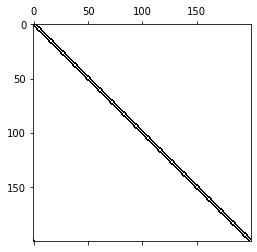

In [5]:
%%time
GBN1 = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, nongeometric_degree = nGD, manifold = topology)
Adjacency = GBN1.A

#TRI = min(num_TRI(Adjacency))
plt.spy(Adjacency)

In [6]:
GBN1.triangles

{'0': [[1, 199], [1, 2], [198, 199]],
 '1': [[0, 199], [0, 2], [2, 3]],
 '2': [[3, 4], [0, 1], [1, 3]],
 '3': [[4, 5], [2, 4], [1, 2]],
 '4': [[3, 5], [2, 3], [5, 6]],
 '5': [[3, 4], [4, 6], [6, 7]],
 '6': [[4, 5], [8, 7], [5, 7]],
 '7': [[8, 6], [8, 9], [5, 6]],
 '8': [[6, 7], [9, 7], [9, 10]],
 '9': [[10, 11], [8, 7], [8, 10]],
 '10': [[9, 11], [11, 12], [8, 9]],
 '11': [[9, 10], [12, 13], [10, 12]],
 '12': [[13, 14], [11, 13], [10, 11]],
 '13': [[12, 14], [14, 15], [11, 12]],
 '14': [[12, 13], [16, 15], [13, 15]],
 '15': [[16, 14], [13, 14], [16, 17]],
 '16': [[14, 15], [17, 18], [17, 15]],
 '17': [[16, 18], [16, 15], [18, 19]],
 '18': [[19, 20], [16, 17], [17, 19]],
 '19': [[20, 21], [18, 20], [17, 18]],
 '20': [[19, 21], [18, 19], [21, 22]],
 '21': [[22, 23], [19, 20], [20, 22]],
 '22': [[21, 23], [20, 21], [24, 23]],
 '23': [[21, 22], [24, 22], [24, 25]],
 '24': [[25, 26], [22, 23], [25, 23]],
 '25': [[24, 26], [26, 27], [24, 23]],
 '26': [[27, 28], [24, 25], [25, 27]],
 '27': [[

TypeError: 'int' object is not iterable

In [6]:
from itertools import combinations

def k_cliques(GBN1):
    # 2-cliques
    cliques = [set(f) for f in np.array(np.nonzero(GBN1.A)).T]
    k = 2

    while cliques:
        # result
        yield k, cliques

        # merge k-cliques into (k+1)-cliques
        cliques_1 = set()
        for u, v in combinations(cliques, 2):
            w = u ^ v
            print(u,v,w)
            if len(w) == 2 and set(w) in cliques:
                cliques_1.add(tuple(u | w))

        # remove duplicates
        cliques = list(map(set, cliques_1))
        k += 1


def return_cliques(GBN1, size_k = 3):
    for k, clique in k_cliques(GBN1):
        if k == size_k: cliques = clique
    triangles = {}    
    for i in range(200):
        temp = []
        for j,e in enumerate(cliques):
            if i in e: temp.append(list(e.difference({i})))
        triangles['%d'%i] = temp       
    return(triangles)

In [7]:
[f for f in np.array(np.nonzero(GBN1.A)).T]

NameError: name 'GBN1' is not defined

In [20]:
triangles = return_cliques(GBN1)

{0, 1} {0, 2} {1, 2}
{0, 1} {0, 198} {1, 198}
{0, 1} {0, 199} {1, 199}
{0, 1} {0, 1} set()
{0, 1} {1, 2} {0, 2}
{0, 1} {1, 3} {0, 3}
{0, 1} {1, 199} {0, 199}
{0, 1} {0, 2} {1, 2}
{0, 1} {1, 2} {0, 2}
{0, 1} {2, 3} {0, 1, 2, 3}
{0, 1} {2, 4} {0, 1, 2, 4}
{0, 1} {1, 3} {0, 3}
{0, 1} {2, 3} {0, 1, 2, 3}
{0, 1} {3, 4} {0, 1, 3, 4}
{0, 1} {3, 5} {0, 1, 3, 5}
{0, 1} {2, 4} {0, 1, 2, 4}
{0, 1} {3, 4} {0, 1, 3, 4}
{0, 1} {4, 5} {0, 1, 4, 5}
{0, 1} {4, 6} {0, 1, 4, 6}
{0, 1} {3, 5} {0, 1, 3, 5}
{0, 1} {4, 5} {0, 1, 4, 5}
{0, 1} {5, 6} {0, 1, 5, 6}
{0, 1} {5, 7} {0, 1, 5, 7}
{0, 1} {4, 6} {0, 1, 4, 6}
{0, 1} {5, 6} {0, 1, 5, 6}
{0, 1} {6, 7} {0, 1, 6, 7}
{0, 1} {8, 6} {8, 0, 6, 1}
{0, 1} {5, 7} {0, 1, 5, 7}
{0, 1} {6, 7} {0, 1, 6, 7}
{0, 1} {8, 7} {8, 0, 1, 7}
{0, 1} {9, 7} {0, 9, 1, 7}
{0, 1} {8, 6} {8, 0, 6, 1}
{0, 1} {8, 7} {8, 0, 1, 7}
{0, 1} {8, 9} {8, 9, 0, 1}
{0, 1} {8, 10} {8, 0, 10, 1}
{0, 1} {9, 7} {0, 9, 1, 7}
{0, 1} {8, 9} {8, 9, 0, 1}
{0, 1} {9, 10} {0, 9, 10, 1}
{0, 1} {9, 11} {0, 

{0, 1} {112, 113} {112, 113, 0, 1}
{0, 1} {112, 114} {112, 0, 114, 1}
{0, 1} {113, 111} {0, 113, 1, 111}
{0, 1} {112, 113} {112, 113, 0, 1}
{0, 1} {113, 114} {0, 113, 114, 1}
{0, 1} {113, 115} {0, 113, 115, 1}
{0, 1} {112, 114} {112, 0, 114, 1}
{0, 1} {113, 114} {0, 113, 114, 1}
{0, 1} {114, 115} {0, 1, 114, 115}
{0, 1} {114, 116} {0, 1, 114, 116}
{0, 1} {113, 115} {0, 113, 115, 1}
{0, 1} {114, 115} {0, 1, 114, 115}
{0, 1} {115, 116} {0, 1, 115, 116}
{0, 1} {115, 117} {0, 1, 115, 117}
{0, 1} {114, 116} {0, 1, 114, 116}
{0, 1} {115, 116} {0, 1, 115, 116}
{0, 1} {116, 117} {0, 1, 116, 117}
{0, 1} {116, 118} {0, 1, 116, 118}
{0, 1} {115, 117} {0, 1, 115, 117}
{0, 1} {116, 117} {0, 1, 116, 117}
{0, 1} {117, 118} {0, 1, 117, 118}
{0, 1} {117, 119} {0, 1, 117, 119}
{0, 1} {116, 118} {0, 1, 116, 118}
{0, 1} {117, 118} {0, 1, 117, 118}
{0, 1} {118, 119} {0, 1, 118, 119}
{0, 1} {120, 118} {120, 0, 118, 1}
{0, 1} {117, 119} {0, 1, 117, 119}
{0, 1} {118, 119} {0, 1, 118, 119}
{0, 1} {120, 119} {1

{0, 2} {36, 38} {0, 2, 36, 38}
{0, 2} {37, 38} {0, 2, 37, 38}
{0, 2} {38, 39} {0, 2, 38, 39}
{0, 2} {40, 38} {40, 0, 2, 38}
{0, 2} {37, 39} {0, 2, 37, 39}
{0, 2} {38, 39} {0, 2, 38, 39}
{0, 2} {40, 39} {40, 0, 2, 39}
{0, 2} {41, 39} {0, 41, 2, 39}
{0, 2} {40, 38} {40, 0, 2, 38}
{0, 2} {40, 39} {40, 0, 2, 39}
{0, 2} {40, 41} {40, 41, 2, 0}
{0, 2} {40, 42} {40, 0, 42, 2}
{0, 2} {41, 39} {0, 41, 2, 39}
{0, 2} {40, 41} {40, 41, 2, 0}
{0, 2} {41, 42} {0, 41, 42, 2}
{0, 2} {41, 43} {0, 41, 2, 43}
{0, 2} {40, 42} {40, 0, 42, 2}
{0, 2} {41, 42} {0, 41, 42, 2}
{0, 2} {42, 43} {0, 2, 42, 43}
{0, 2} {42, 44} {0, 42, 2, 44}
{0, 2} {41, 43} {0, 41, 2, 43}
{0, 2} {42, 43} {0, 2, 42, 43}
{0, 2} {43, 44} {0, 2, 43, 44}
{0, 2} {43, 45} {0, 2, 43, 45}
{0, 2} {42, 44} {0, 42, 2, 44}
{0, 2} {43, 44} {0, 2, 43, 44}
{0, 2} {44, 45} {0, 2, 44, 45}
{0, 2} {44, 46} {0, 2, 44, 46}
{0, 2} {43, 45} {0, 2, 43, 45}
{0, 2} {44, 45} {0, 2, 44, 45}
{0, 2} {45, 46} {0, 2, 45, 46}
{0, 2} {45, 47} {0, 2, 45, 47}
{0, 2} {

{0, 2} {161, 163} {0, 161, 2, 163}
{0, 2} {162, 163} {0, 2, 162, 163}
{0, 2} {163, 164} {0, 2, 163, 164}
{0, 2} {163, 165} {0, 2, 163, 165}
{0, 2} {162, 164} {0, 162, 2, 164}
{0, 2} {163, 164} {0, 2, 163, 164}
{0, 2} {164, 165} {0, 2, 164, 165}
{0, 2} {164, 166} {0, 2, 164, 166}
{0, 2} {163, 165} {0, 2, 163, 165}
{0, 2} {164, 165} {0, 2, 164, 165}
{0, 2} {165, 166} {0, 2, 165, 166}
{0, 2} {165, 167} {0, 2, 165, 167}
{0, 2} {164, 166} {0, 2, 164, 166}
{0, 2} {165, 166} {0, 2, 165, 166}
{0, 2} {166, 167} {0, 2, 166, 167}
{0, 2} {168, 166} {168, 0, 2, 166}
{0, 2} {165, 167} {0, 2, 165, 167}
{0, 2} {166, 167} {0, 2, 166, 167}
{0, 2} {168, 167} {168, 0, 2, 167}
{0, 2} {169, 167} {0, 169, 2, 167}
{0, 2} {168, 166} {168, 0, 2, 166}
{0, 2} {168, 167} {168, 0, 2, 167}
{0, 2} {168, 169} {168, 169, 2, 0}
{0, 2} {168, 170} {168, 0, 170, 2}
{0, 2} {169, 167} {0, 169, 2, 167}
{0, 2} {168, 169} {168, 169, 2, 0}
{0, 2} {169, 170} {0, 169, 170, 2}
{0, 2} {169, 171} {0, 169, 2, 171}
{0, 2} {168, 170} {1

{0, 198} {88, 90} {88, 0, 90, 198}
{0, 198} {89, 87} {0, 89, 198, 87}
{0, 198} {88, 89} {88, 89, 198, 0}
{0, 198} {89, 90} {0, 89, 90, 198}
{0, 198} {89, 91} {0, 89, 91, 198}
{0, 198} {88, 90} {88, 0, 90, 198}
{0, 198} {89, 90} {0, 89, 90, 198}
{0, 198} {90, 91} {0, 90, 91, 198}
{0, 198} {90, 92} {0, 90, 92, 198}
{0, 198} {89, 91} {0, 89, 91, 198}
{0, 198} {90, 91} {0, 90, 91, 198}
{0, 198} {91, 92} {0, 91, 92, 198}
{0, 198} {91, 93} {0, 91, 93, 198}
{0, 198} {90, 92} {0, 90, 92, 198}
{0, 198} {91, 92} {0, 91, 92, 198}
{0, 198} {92, 93} {0, 92, 93, 198}
{0, 198} {92, 94} {0, 92, 198, 94}
{0, 198} {91, 93} {0, 91, 93, 198}
{0, 198} {92, 93} {0, 92, 93, 198}
{0, 198} {93, 94} {0, 198, 93, 94}
{0, 198} {93, 95} {0, 93, 198, 95}
{0, 198} {92, 94} {0, 92, 198, 94}
{0, 198} {93, 94} {0, 198, 93, 94}
{0, 198} {94, 95} {0, 198, 94, 95}
{0, 198} {96, 94} {96, 0, 198, 94}
{0, 198} {93, 95} {0, 93, 198, 95}
{0, 198} {94, 95} {0, 198, 94, 95}
{0, 198} {96, 95} {96, 0, 198, 95}
{0, 198} {97, 95} {0

{0, 199} {14, 15} {0, 199, 14, 15}
{0, 199} {16, 14} {16, 0, 14, 199}
{0, 199} {13, 15} {0, 199, 13, 15}
{0, 199} {14, 15} {0, 199, 14, 15}
{0, 199} {16, 15} {16, 0, 199, 15}
{0, 199} {17, 15} {0, 17, 199, 15}
{0, 199} {16, 14} {16, 0, 14, 199}
{0, 199} {16, 15} {16, 0, 199, 15}
{0, 199} {16, 17} {16, 17, 0, 199}
{0, 199} {16, 18} {16, 0, 18, 199}
{0, 199} {17, 15} {0, 17, 199, 15}
{0, 199} {16, 17} {16, 17, 0, 199}
{0, 199} {17, 18} {0, 17, 18, 199}
{0, 199} {17, 19} {0, 17, 19, 199}
{0, 199} {16, 18} {16, 0, 18, 199}
{0, 199} {17, 18} {0, 17, 18, 199}
{0, 199} {18, 19} {0, 18, 19, 199}
{0, 199} {18, 20} {0, 18, 20, 199}
{0, 199} {17, 19} {0, 17, 19, 199}
{0, 199} {18, 19} {0, 18, 19, 199}
{0, 199} {19, 20} {0, 19, 20, 199}
{0, 199} {19, 21} {0, 19, 21, 199}
{0, 199} {18, 20} {0, 18, 20, 199}
{0, 199} {19, 20} {0, 19, 20, 199}
{0, 199} {20, 21} {0, 20, 21, 199}
{0, 199} {20, 22} {0, 20, 22, 199}
{0, 199} {19, 21} {0, 19, 21, 199}
{0, 199} {20, 21} {0, 20, 21, 199}
{0, 199} {21, 22} {0

{0, 199} {139, 140} {0, 139, 140, 199}
{0, 199} {139, 141} {0, 139, 141, 199}
{0, 199} {138, 140} {0, 138, 140, 199}
{0, 199} {139, 140} {0, 139, 140, 199}
{0, 199} {140, 141} {0, 140, 141, 199}
{0, 199} {140, 142} {0, 140, 142, 199}
{0, 199} {139, 141} {0, 139, 141, 199}
{0, 199} {140, 141} {0, 140, 141, 199}
{0, 199} {141, 142} {0, 141, 142, 199}
{0, 199} {141, 143} {0, 199, 141, 143}
{0, 199} {140, 142} {0, 140, 142, 199}
{0, 199} {141, 142} {0, 141, 142, 199}
{0, 199} {142, 143} {0, 199, 142, 143}
{0, 199} {144, 142} {144, 0, 142, 199}
{0, 199} {141, 143} {0, 199, 141, 143}
{0, 199} {142, 143} {0, 199, 142, 143}
{0, 199} {144, 143} {144, 0, 199, 143}
{0, 199} {145, 143} {0, 145, 199, 143}
{0, 199} {144, 142} {144, 0, 142, 199}
{0, 199} {144, 143} {144, 0, 199, 143}
{0, 199} {144, 145} {144, 145, 0, 199}
{0, 199} {144, 146} {144, 0, 146, 199}
{0, 199} {145, 143} {0, 145, 199, 143}
{0, 199} {144, 145} {144, 145, 0, 199}
{0, 199} {145, 146} {0, 145, 146, 199}
{0, 199} {145, 147} {0, 1

{0, 1} {65, 67} {0, 65, 67, 1}
{0, 1} {64, 66} {64, 0, 66, 1}
{0, 1} {65, 66} {0, 65, 66, 1}
{0, 1} {66, 67} {0, 1, 66, 67}
{0, 1} {66, 68} {0, 1, 66, 68}
{0, 1} {65, 67} {0, 65, 67, 1}
{0, 1} {66, 67} {0, 1, 66, 67}
{0, 1} {67, 68} {0, 1, 67, 68}
{0, 1} {67, 69} {0, 1, 67, 69}
{0, 1} {66, 68} {0, 1, 66, 68}
{0, 1} {67, 68} {0, 1, 67, 68}
{0, 1} {68, 69} {0, 1, 68, 69}
{0, 1} {68, 70} {0, 1, 68, 70}
{0, 1} {67, 69} {0, 1, 67, 69}
{0, 1} {68, 69} {0, 1, 68, 69}
{0, 1} {69, 70} {0, 1, 69, 70}
{0, 1} {69, 71} {0, 1, 69, 71}
{0, 1} {68, 70} {0, 1, 68, 70}
{0, 1} {69, 70} {0, 1, 69, 70}
{0, 1} {70, 71} {0, 1, 70, 71}
{0, 1} {72, 70} {72, 0, 70, 1}
{0, 1} {69, 71} {0, 1, 69, 71}
{0, 1} {70, 71} {0, 1, 70, 71}
{0, 1} {72, 71} {72, 0, 1, 71}
{0, 1} {73, 71} {0, 73, 1, 71}
{0, 1} {72, 70} {72, 0, 70, 1}
{0, 1} {72, 71} {72, 0, 1, 71}
{0, 1} {72, 73} {72, 73, 0, 1}
{0, 1} {72, 74} {72, 0, 74, 1}
{0, 1} {73, 71} {0, 73, 1, 71}
{0, 1} {72, 73} {72, 73, 0, 1}
{0, 1} {73, 74} {0, 73, 74, 1}
{0, 1} {

{0, 1} {192, 190} {192, 0, 190, 1}
{0, 1} {189, 191} {0, 1, 189, 191}
{0, 1} {190, 191} {0, 1, 190, 191}
{0, 1} {192, 191} {192, 0, 1, 191}
{0, 1} {193, 191} {0, 193, 1, 191}
{0, 1} {192, 190} {192, 0, 190, 1}
{0, 1} {192, 191} {192, 0, 1, 191}
{0, 1} {192, 193} {192, 193, 0, 1}
{0, 1} {192, 194} {192, 0, 194, 1}
{0, 1} {193, 191} {0, 193, 1, 191}
{0, 1} {192, 193} {192, 193, 0, 1}
{0, 1} {193, 194} {0, 193, 194, 1}
{0, 1} {193, 195} {0, 193, 195, 1}
{0, 1} {192, 194} {192, 0, 194, 1}
{0, 1} {193, 194} {0, 193, 194, 1}
{0, 1} {194, 195} {0, 1, 194, 195}
{0, 1} {194, 196} {0, 1, 194, 196}
{0, 1} {193, 195} {0, 193, 195, 1}
{0, 1} {194, 195} {0, 1, 194, 195}
{0, 1} {195, 196} {0, 1, 195, 196}
{0, 1} {195, 197} {0, 1, 195, 197}
{0, 1} {194, 196} {0, 1, 194, 196}
{0, 1} {195, 196} {0, 1, 195, 196}
{0, 1} {196, 197} {0, 1, 196, 197}
{0, 1} {196, 198} {0, 1, 196, 198}
{0, 1} {195, 197} {0, 1, 195, 197}
{0, 1} {196, 197} {0, 1, 196, 197}
{0, 1} {197, 198} {0, 1, 197, 198}
{0, 1} {197, 199} {0

{1, 2} {144, 142} {144, 1, 2, 142}
{1, 2} {141, 143} {1, 2, 141, 143}
{1, 2} {142, 143} {1, 2, 142, 143}
{1, 2} {144, 143} {144, 1, 2, 143}
{1, 2} {145, 143} {145, 2, 1, 143}
{1, 2} {144, 142} {144, 1, 2, 142}
{1, 2} {144, 143} {144, 1, 2, 143}
{1, 2} {144, 145} {144, 145, 2, 1}
{1, 2} {144, 146} {144, 1, 146, 2}
{1, 2} {145, 143} {145, 2, 1, 143}
{1, 2} {144, 145} {144, 145, 2, 1}
{1, 2} {145, 146} {145, 146, 2, 1}
{1, 2} {145, 147} {145, 2, 147, 1}
{1, 2} {144, 146} {144, 1, 146, 2}
{1, 2} {145, 146} {145, 146, 2, 1}
{1, 2} {146, 147} {2, 1, 146, 147}
{1, 2} {146, 148} {1, 146, 2, 148}
{1, 2} {145, 147} {145, 2, 147, 1}
{1, 2} {146, 147} {2, 1, 146, 147}
{1, 2} {147, 148} {1, 2, 147, 148}
{1, 2} {147, 149} {1, 2, 147, 149}
{1, 2} {146, 148} {1, 146, 2, 148}
{1, 2} {147, 148} {1, 2, 147, 148}
{1, 2} {148, 149} {1, 2, 148, 149}
{1, 2} {148, 150} {1, 2, 148, 150}
{1, 2} {147, 149} {1, 2, 147, 149}
{1, 2} {148, 149} {1, 2, 148, 149}
{1, 2} {149, 150} {1, 2, 149, 150}
{1, 2} {149, 151} {1

{1, 3} {126, 127} {1, 3, 126, 127}
{1, 3} {128, 127} {128, 1, 3, 127}
{1, 3} {129, 127} {129, 3, 1, 127}
{1, 3} {128, 126} {128, 1, 3, 126}
{1, 3} {128, 127} {128, 1, 3, 127}
{1, 3} {128, 129} {128, 129, 3, 1}
{1, 3} {128, 130} {128, 1, 130, 3}
{1, 3} {129, 127} {129, 3, 1, 127}
{1, 3} {128, 129} {128, 129, 3, 1}
{1, 3} {129, 130} {129, 130, 3, 1}
{1, 3} {129, 131} {3, 129, 131, 1}
{1, 3} {128, 130} {128, 1, 130, 3}
{1, 3} {129, 130} {129, 130, 3, 1}
{1, 3} {130, 131} {3, 1, 130, 131}
{1, 3} {130, 132} {1, 130, 3, 132}
{1, 3} {129, 131} {3, 129, 131, 1}
{1, 3} {130, 131} {3, 1, 130, 131}
{1, 3} {131, 132} {3, 1, 131, 132}
{1, 3} {131, 133} {3, 1, 131, 133}
{1, 3} {130, 132} {1, 130, 3, 132}
{1, 3} {131, 132} {3, 1, 131, 132}
{1, 3} {132, 133} {1, 3, 132, 133}
{1, 3} {132, 134} {1, 3, 132, 134}
{1, 3} {131, 133} {3, 1, 131, 133}
{1, 3} {132, 133} {1, 3, 132, 133}
{1, 3} {133, 134} {1, 3, 133, 134}
{1, 3} {133, 135} {1, 3, 133, 135}
{1, 3} {132, 134} {1, 3, 132, 134}
{1, 3} {133, 134} {1

{1, 199} {53, 54} {1, 53, 54, 199}
{1, 199} {54, 55} {1, 199, 54, 55}
{1, 199} {56, 54} {56, 1, 54, 199}
{1, 199} {53, 55} {1, 199, 53, 55}
{1, 199} {54, 55} {1, 199, 54, 55}
{1, 199} {56, 55} {56, 1, 199, 55}
{1, 199} {57, 55} {57, 199, 1, 55}
{1, 199} {56, 54} {56, 1, 54, 199}
{1, 199} {56, 55} {56, 1, 199, 55}
{1, 199} {56, 57} {56, 57, 1, 199}
{1, 199} {56, 58} {56, 1, 58, 199}
{1, 199} {57, 55} {57, 199, 1, 55}
{1, 199} {56, 57} {56, 57, 1, 199}
{1, 199} {57, 58} {57, 58, 1, 199}
{1, 199} {57, 59} {57, 59, 1, 199}
{1, 199} {56, 58} {56, 1, 58, 199}
{1, 199} {57, 58} {57, 58, 1, 199}
{1, 199} {58, 59} {1, 58, 59, 199}
{1, 199} {58, 60} {1, 58, 60, 199}
{1, 199} {57, 59} {57, 59, 1, 199}
{1, 199} {58, 59} {1, 58, 59, 199}
{1, 199} {59, 60} {1, 59, 60, 199}
{1, 199} {59, 61} {1, 59, 61, 199}
{1, 199} {58, 60} {1, 58, 60, 199}
{1, 199} {59, 60} {1, 59, 60, 199}
{1, 199} {60, 61} {1, 60, 61, 199}
{1, 199} {60, 62} {1, 60, 62, 199}
{1, 199} {59, 61} {1, 59, 61, 199}
{1, 199} {60, 61} {1

{1, 199} {177, 179} {177, 179, 1, 199}
{1, 199} {178, 179} {1, 178, 179, 199}
{1, 199} {179, 180} {1, 179, 180, 199}
{1, 199} {179, 181} {1, 179, 181, 199}
{1, 199} {178, 180} {1, 178, 180, 199}
{1, 199} {179, 180} {1, 179, 180, 199}
{1, 199} {180, 181} {1, 180, 181, 199}
{1, 199} {180, 182} {1, 180, 182, 199}
{1, 199} {179, 181} {1, 179, 181, 199}
{1, 199} {180, 181} {1, 180, 181, 199}
{1, 199} {181, 182} {1, 181, 182, 199}
{1, 199} {181, 183} {1, 199, 181, 183}
{1, 199} {180, 182} {1, 180, 182, 199}
{1, 199} {181, 182} {1, 181, 182, 199}
{1, 199} {182, 183} {1, 199, 182, 183}
{1, 199} {184, 182} {184, 1, 182, 199}
{1, 199} {181, 183} {1, 199, 181, 183}
{1, 199} {182, 183} {1, 199, 182, 183}
{1, 199} {184, 183} {184, 1, 199, 183}
{1, 199} {185, 183} {185, 199, 1, 183}
{1, 199} {184, 182} {184, 1, 182, 199}
{1, 199} {184, 183} {184, 1, 199, 183}
{1, 199} {184, 185} {184, 185, 1, 199}
{1, 199} {184, 186} {184, 1, 186, 199}
{1, 199} {185, 183} {185, 199, 1, 183}
{1, 199} {184, 185} {184,

{0, 2} {105, 106} {0, 105, 106, 2}
{0, 2} {106, 107} {0, 2, 106, 107}
{0, 2} {106, 108} {0, 106, 2, 108}
{0, 2} {105, 107} {0, 105, 2, 107}
{0, 2} {106, 107} {0, 2, 106, 107}
{0, 2} {107, 108} {0, 2, 107, 108}
{0, 2} {107, 109} {0, 2, 107, 109}
{0, 2} {106, 108} {0, 106, 2, 108}
{0, 2} {107, 108} {0, 2, 107, 108}
{0, 2} {108, 109} {0, 2, 108, 109}
{0, 2} {108, 110} {0, 2, 108, 110}
{0, 2} {107, 109} {0, 2, 107, 109}
{0, 2} {108, 109} {0, 2, 108, 109}
{0, 2} {109, 110} {0, 2, 109, 110}
{0, 2} {109, 111} {0, 2, 109, 111}
{0, 2} {108, 110} {0, 2, 108, 110}
{0, 2} {109, 110} {0, 2, 109, 110}
{0, 2} {110, 111} {0, 2, 110, 111}
{0, 2} {112, 110} {112, 0, 2, 110}
{0, 2} {109, 111} {0, 2, 109, 111}
{0, 2} {110, 111} {0, 2, 110, 111}
{0, 2} {112, 111} {112, 0, 2, 111}
{0, 2} {113, 111} {0, 113, 2, 111}
{0, 2} {112, 110} {112, 0, 2, 110}
{0, 2} {112, 111} {112, 0, 2, 111}
{0, 2} {112, 113} {112, 113, 2, 0}
{0, 2} {112, 114} {112, 0, 114, 2}
{0, 2} {113, 111} {0, 113, 2, 111}
{0, 2} {112, 113} {1

{1, 2} {33, 35} {33, 2, 35, 1}
{1, 2} {32, 34} {32, 1, 34, 2}
{1, 2} {33, 34} {33, 34, 2, 1}
{1, 2} {34, 35} {2, 1, 34, 35}
{1, 2} {34, 36} {1, 34, 2, 36}
{1, 2} {33, 35} {33, 2, 35, 1}
{1, 2} {34, 35} {2, 1, 34, 35}
{1, 2} {35, 36} {1, 2, 35, 36}
{1, 2} {35, 37} {1, 2, 35, 37}
{1, 2} {34, 36} {1, 34, 2, 36}
{1, 2} {35, 36} {1, 2, 35, 36}
{1, 2} {36, 37} {1, 2, 36, 37}
{1, 2} {36, 38} {1, 2, 36, 38}
{1, 2} {35, 37} {1, 2, 35, 37}
{1, 2} {36, 37} {1, 2, 36, 37}
{1, 2} {37, 38} {1, 2, 37, 38}
{1, 2} {37, 39} {1, 2, 37, 39}
{1, 2} {36, 38} {1, 2, 36, 38}
{1, 2} {37, 38} {1, 2, 37, 38}
{1, 2} {38, 39} {1, 2, 38, 39}
{1, 2} {40, 38} {40, 1, 2, 38}
{1, 2} {37, 39} {1, 2, 37, 39}
{1, 2} {38, 39} {1, 2, 38, 39}
{1, 2} {40, 39} {40, 1, 2, 39}
{1, 2} {41, 39} {41, 2, 1, 39}
{1, 2} {40, 38} {40, 1, 2, 38}
{1, 2} {40, 39} {40, 1, 2, 39}
{1, 2} {40, 41} {40, 41, 2, 1}
{1, 2} {40, 42} {40, 1, 42, 2}
{1, 2} {41, 39} {41, 2, 1, 39}
{1, 2} {40, 41} {40, 41, 2, 1}
{1, 2} {41, 42} {41, 42, 2, 1}
{1, 2} {

{1, 2} {160, 158} {160, 1, 2, 158}
{1, 2} {157, 159} {1, 2, 157, 159}
{1, 2} {158, 159} {1, 2, 158, 159}
{1, 2} {160, 159} {160, 1, 2, 159}
{1, 2} {161, 159} {161, 2, 1, 159}
{1, 2} {160, 158} {160, 1, 2, 158}
{1, 2} {160, 159} {160, 1, 2, 159}
{1, 2} {160, 161} {160, 161, 2, 1}
{1, 2} {160, 162} {160, 1, 162, 2}
{1, 2} {161, 159} {161, 2, 1, 159}
{1, 2} {160, 161} {160, 161, 2, 1}
{1, 2} {161, 162} {161, 162, 2, 1}
{1, 2} {161, 163} {161, 2, 163, 1}
{1, 2} {160, 162} {160, 1, 162, 2}
{1, 2} {161, 162} {161, 162, 2, 1}
{1, 2} {162, 163} {2, 1, 162, 163}
{1, 2} {162, 164} {1, 162, 2, 164}
{1, 2} {161, 163} {161, 2, 163, 1}
{1, 2} {162, 163} {2, 1, 162, 163}
{1, 2} {163, 164} {1, 2, 163, 164}
{1, 2} {163, 165} {1, 2, 163, 165}
{1, 2} {162, 164} {1, 162, 2, 164}
{1, 2} {163, 164} {1, 2, 163, 164}
{1, 2} {164, 165} {1, 2, 164, 165}
{1, 2} {164, 166} {1, 2, 164, 166}
{1, 2} {163, 165} {1, 2, 163, 165}
{1, 2} {164, 165} {1, 2, 164, 165}
{1, 2} {165, 166} {1, 2, 165, 166}
{1, 2} {165, 167} {1

{2, 3} {44, 46} {2, 3, 44, 46}
{2, 3} {43, 45} {3, 2, 43, 45}
{2, 3} {44, 45} {2, 3, 44, 45}
{2, 3} {45, 46} {2, 3, 45, 46}
{2, 3} {45, 47} {2, 3, 45, 47}
{2, 3} {44, 46} {2, 3, 44, 46}
{2, 3} {45, 46} {2, 3, 45, 46}
{2, 3} {46, 47} {2, 3, 46, 47}
{2, 3} {48, 46} {48, 2, 3, 46}
{2, 3} {45, 47} {2, 3, 45, 47}
{2, 3} {46, 47} {2, 3, 46, 47}
{2, 3} {48, 47} {48, 2, 3, 47}
{2, 3} {49, 47} {49, 2, 3, 47}
{2, 3} {48, 46} {48, 2, 3, 46}
{2, 3} {48, 47} {48, 2, 3, 47}
{2, 3} {48, 49} {48, 49, 2, 3}
{2, 3} {48, 50} {48, 3, 50, 2}
{2, 3} {49, 47} {49, 2, 3, 47}
{2, 3} {48, 49} {48, 49, 2, 3}
{2, 3} {49, 50} {3, 49, 50, 2}
{2, 3} {49, 51} {3, 49, 2, 51}
{2, 3} {48, 50} {48, 3, 50, 2}
{2, 3} {49, 50} {3, 49, 50, 2}
{2, 3} {50, 51} {2, 3, 50, 51}
{2, 3} {50, 52} {3, 50, 2, 52}
{2, 3} {49, 51} {3, 49, 2, 51}
{2, 3} {50, 51} {2, 3, 50, 51}
{2, 3} {51, 52} {3, 2, 51, 52}
{2, 3} {51, 53} {3, 2, 51, 53}
{2, 3} {50, 52} {3, 50, 2, 52}
{2, 3} {51, 52} {3, 2, 51, 52}
{2, 3} {52, 53} {2, 3, 52, 53}
{2, 3} {

{2, 3} {169, 171} {3, 169, 2, 171}
{2, 3} {168, 170} {168, 3, 170, 2}
{2, 3} {169, 170} {3, 169, 170, 2}
{2, 3} {170, 171} {2, 3, 170, 171}
{2, 3} {170, 172} {3, 170, 2, 172}
{2, 3} {169, 171} {3, 169, 2, 171}
{2, 3} {170, 171} {2, 3, 170, 171}
{2, 3} {171, 172} {3, 2, 171, 172}
{2, 3} {171, 173} {3, 2, 171, 173}
{2, 3} {170, 172} {3, 170, 2, 172}
{2, 3} {171, 172} {3, 2, 171, 172}
{2, 3} {172, 173} {2, 3, 172, 173}
{2, 3} {172, 174} {2, 3, 172, 174}
{2, 3} {171, 173} {3, 2, 171, 173}
{2, 3} {172, 173} {2, 3, 172, 173}
{2, 3} {173, 174} {2, 3, 173, 174}
{2, 3} {173, 175} {2, 3, 173, 175}
{2, 3} {172, 174} {2, 3, 172, 174}
{2, 3} {173, 174} {2, 3, 173, 174}
{2, 3} {174, 175} {2, 3, 174, 175}
{2, 3} {176, 174} {176, 2, 3, 174}
{2, 3} {173, 175} {2, 3, 173, 175}
{2, 3} {174, 175} {2, 3, 174, 175}
{2, 3} {176, 175} {176, 2, 3, 175}
{2, 3} {177, 175} {177, 2, 3, 175}
{2, 3} {176, 174} {176, 2, 3, 174}
{2, 3} {176, 175} {176, 2, 3, 175}
{2, 3} {176, 177} {176, 177, 2, 3}
{2, 3} {176, 178} {1

{2, 4} {56, 54} {56, 2, 4, 54}
{2, 4} {56, 55} {56, 2, 4, 55}
{2, 4} {56, 57} {56, 57, 2, 4}
{2, 4} {56, 58} {56, 58, 2, 4}
{2, 4} {57, 55} {57, 2, 4, 55}
{2, 4} {56, 57} {56, 57, 2, 4}
{2, 4} {57, 58} {57, 58, 2, 4}
{2, 4} {57, 59} {57, 2, 59, 4}
{2, 4} {56, 58} {56, 58, 2, 4}
{2, 4} {57, 58} {57, 58, 2, 4}
{2, 4} {58, 59} {2, 58, 59, 4}
{2, 4} {58, 60} {58, 2, 60, 4}
{2, 4} {57, 59} {57, 2, 59, 4}
{2, 4} {58, 59} {2, 58, 59, 4}
{2, 4} {59, 60} {2, 59, 60, 4}
{2, 4} {59, 61} {2, 59, 4, 61}
{2, 4} {58, 60} {58, 2, 60, 4}
{2, 4} {59, 60} {2, 59, 60, 4}
{2, 4} {60, 61} {2, 4, 60, 61}
{2, 4} {60, 62} {2, 60, 4, 62}
{2, 4} {59, 61} {2, 59, 4, 61}
{2, 4} {60, 61} {2, 4, 60, 61}
{2, 4} {61, 62} {2, 4, 61, 62}
{2, 4} {61, 63} {2, 4, 61, 63}
{2, 4} {60, 62} {2, 60, 4, 62}
{2, 4} {61, 62} {2, 4, 61, 62}
{2, 4} {62, 63} {2, 4, 62, 63}
{2, 4} {64, 62} {64, 2, 4, 62}
{2, 4} {61, 63} {2, 4, 61, 63}
{2, 4} {62, 63} {2, 4, 62, 63}
{2, 4} {64, 63} {64, 2, 4, 63}
{2, 4} {65, 63} {65, 2, 4, 63}
{2, 4} {

{2, 4} {121, 122} {121, 122, 2, 4}
{2, 4} {121, 123} {121, 2, 123, 4}
{2, 4} {120, 122} {120, 122, 2, 4}
{2, 4} {121, 122} {121, 122, 2, 4}
{2, 4} {122, 123} {2, 122, 123, 4}
{2, 4} {122, 124} {122, 2, 124, 4}
{2, 4} {121, 123} {121, 2, 123, 4}
{2, 4} {122, 123} {2, 122, 123, 4}
{2, 4} {123, 124} {2, 123, 124, 4}
{2, 4} {123, 125} {2, 123, 4, 125}
{2, 4} {122, 124} {122, 2, 124, 4}
{2, 4} {123, 124} {2, 123, 124, 4}
{2, 4} {124, 125} {2, 4, 124, 125}
{2, 4} {124, 126} {2, 124, 4, 126}
{2, 4} {123, 125} {2, 123, 4, 125}
{2, 4} {124, 125} {2, 4, 124, 125}
{2, 4} {125, 126} {2, 4, 125, 126}
{2, 4} {125, 127} {2, 4, 125, 127}
{2, 4} {124, 126} {2, 124, 4, 126}
{2, 4} {125, 126} {2, 4, 125, 126}
{2, 4} {126, 127} {2, 4, 126, 127}
{2, 4} {128, 126} {128, 2, 4, 126}
{2, 4} {125, 127} {2, 4, 125, 127}
{2, 4} {126, 127} {2, 4, 126, 127}
{2, 4} {128, 127} {128, 2, 4, 127}
{2, 4} {129, 127} {129, 2, 4, 127}
{2, 4} {128, 126} {128, 2, 4, 126}
{2, 4} {128, 127} {128, 2, 4, 127}
{2, 4} {128, 129} {1

{1, 3} {25, 27} {3, 25, 27, 1}
{1, 3} {24, 26} {24, 1, 26, 3}
{1, 3} {25, 26} {25, 26, 3, 1}
{1, 3} {26, 27} {3, 1, 26, 27}
{1, 3} {26, 28} {1, 26, 3, 28}
{1, 3} {25, 27} {3, 25, 27, 1}
{1, 3} {26, 27} {3, 1, 26, 27}
{1, 3} {27, 28} {3, 1, 27, 28}
{1, 3} {27, 29} {3, 1, 27, 29}
{1, 3} {26, 28} {1, 26, 3, 28}
{1, 3} {27, 28} {3, 1, 27, 28}
{1, 3} {28, 29} {1, 3, 28, 29}
{1, 3} {28, 30} {1, 3, 28, 30}
{1, 3} {27, 29} {3, 1, 27, 29}
{1, 3} {28, 29} {1, 3, 28, 29}
{1, 3} {29, 30} {1, 3, 29, 30}
{1, 3} {29, 31} {1, 3, 29, 31}
{1, 3} {28, 30} {1, 3, 28, 30}
{1, 3} {29, 30} {1, 3, 29, 30}
{1, 3} {30, 31} {1, 3, 30, 31}
{1, 3} {32, 30} {32, 1, 3, 30}
{1, 3} {29, 31} {1, 3, 29, 31}
{1, 3} {30, 31} {1, 3, 30, 31}
{1, 3} {32, 31} {32, 1, 3, 31}
{1, 3} {33, 31} {33, 3, 1, 31}
{1, 3} {32, 30} {32, 1, 3, 30}
{1, 3} {32, 31} {32, 1, 3, 31}
{1, 3} {32, 33} {32, 33, 3, 1}
{1, 3} {32, 34} {32, 1, 34, 3}
{1, 3} {33, 31} {33, 3, 1, 31}
{1, 3} {32, 33} {32, 33, 3, 1}
{1, 3} {33, 34} {33, 34, 3, 1}
{1, 3} {

{1, 3} {152, 150} {152, 1, 3, 150}
{1, 3} {149, 151} {1, 3, 149, 151}
{1, 3} {150, 151} {1, 3, 150, 151}
{1, 3} {152, 151} {152, 1, 3, 151}
{1, 3} {153, 151} {153, 3, 1, 151}
{1, 3} {152, 150} {152, 1, 3, 150}
{1, 3} {152, 151} {152, 1, 3, 151}
{1, 3} {152, 153} {152, 153, 3, 1}
{1, 3} {152, 154} {152, 1, 154, 3}
{1, 3} {153, 151} {153, 3, 1, 151}
{1, 3} {152, 153} {152, 153, 3, 1}
{1, 3} {153, 154} {153, 154, 3, 1}
{1, 3} {153, 155} {3, 153, 155, 1}
{1, 3} {152, 154} {152, 1, 154, 3}
{1, 3} {153, 154} {153, 154, 3, 1}
{1, 3} {154, 155} {3, 1, 154, 155}
{1, 3} {154, 156} {1, 154, 3, 156}
{1, 3} {153, 155} {3, 153, 155, 1}
{1, 3} {154, 155} {3, 1, 154, 155}
{1, 3} {155, 156} {3, 1, 155, 156}
{1, 3} {155, 157} {3, 1, 155, 157}
{1, 3} {154, 156} {1, 154, 3, 156}
{1, 3} {155, 156} {3, 1, 155, 156}
{1, 3} {156, 157} {1, 3, 156, 157}
{1, 3} {156, 158} {1, 3, 156, 158}
{1, 3} {155, 157} {3, 1, 155, 157}
{1, 3} {156, 157} {1, 3, 156, 157}
{1, 3} {157, 158} {1, 3, 157, 158}
{1, 3} {157, 159} {1

{2, 3} {57, 55} {57, 2, 3, 55}
{2, 3} {56, 54} {56, 2, 3, 54}
{2, 3} {56, 55} {56, 2, 3, 55}
{2, 3} {56, 57} {56, 57, 2, 3}
{2, 3} {56, 58} {56, 3, 58, 2}
{2, 3} {57, 55} {57, 2, 3, 55}
{2, 3} {56, 57} {56, 57, 2, 3}
{2, 3} {57, 58} {3, 57, 58, 2}
{2, 3} {57, 59} {3, 57, 2, 59}
{2, 3} {56, 58} {56, 3, 58, 2}
{2, 3} {57, 58} {3, 57, 58, 2}
{2, 3} {58, 59} {2, 3, 58, 59}
{2, 3} {58, 60} {3, 58, 2, 60}
{2, 3} {57, 59} {3, 57, 2, 59}
{2, 3} {58, 59} {2, 3, 58, 59}
{2, 3} {59, 60} {3, 2, 59, 60}
{2, 3} {59, 61} {3, 2, 59, 61}
{2, 3} {58, 60} {3, 58, 2, 60}
{2, 3} {59, 60} {3, 2, 59, 60}
{2, 3} {60, 61} {2, 3, 60, 61}
{2, 3} {60, 62} {2, 3, 60, 62}
{2, 3} {59, 61} {3, 2, 59, 61}
{2, 3} {60, 61} {2, 3, 60, 61}
{2, 3} {61, 62} {2, 3, 61, 62}
{2, 3} {61, 63} {2, 3, 61, 63}
{2, 3} {60, 62} {2, 3, 60, 62}
{2, 3} {61, 62} {2, 3, 61, 62}
{2, 3} {62, 63} {2, 3, 62, 63}
{2, 3} {64, 62} {64, 2, 3, 62}
{2, 3} {61, 63} {2, 3, 61, 63}
{2, 3} {62, 63} {2, 3, 62, 63}
{2, 3} {64, 63} {64, 2, 3, 63}
{2, 3} {

{2, 3} {136, 137} {136, 137, 2, 3}
{2, 3} {136, 138} {136, 3, 138, 2}
{2, 3} {137, 135} {137, 2, 3, 135}
{2, 3} {136, 137} {136, 137, 2, 3}
{2, 3} {137, 138} {3, 137, 138, 2}
{2, 3} {137, 139} {3, 137, 2, 139}
{2, 3} {136, 138} {136, 3, 138, 2}
{2, 3} {137, 138} {3, 137, 138, 2}
{2, 3} {138, 139} {2, 3, 138, 139}
{2, 3} {138, 140} {3, 138, 2, 140}
{2, 3} {137, 139} {3, 137, 2, 139}
{2, 3} {138, 139} {2, 3, 138, 139}
{2, 3} {139, 140} {3, 2, 139, 140}
{2, 3} {139, 141} {3, 2, 139, 141}
{2, 3} {138, 140} {3, 138, 2, 140}
{2, 3} {139, 140} {3, 2, 139, 140}
{2, 3} {140, 141} {2, 3, 140, 141}
{2, 3} {140, 142} {2, 3, 140, 142}
{2, 3} {139, 141} {3, 2, 139, 141}
{2, 3} {140, 141} {2, 3, 140, 141}
{2, 3} {141, 142} {2, 3, 141, 142}
{2, 3} {141, 143} {2, 3, 141, 143}
{2, 3} {140, 142} {2, 3, 140, 142}
{2, 3} {141, 142} {2, 3, 141, 142}
{2, 3} {142, 143} {2, 3, 142, 143}
{2, 3} {144, 142} {144, 2, 3, 142}
{2, 3} {141, 143} {2, 3, 141, 143}
{2, 3} {142, 143} {2, 3, 142, 143}
{2, 3} {144, 143} {1

{3, 4} {29, 30} {3, 4, 29, 30}
{3, 4} {30, 31} {3, 4, 30, 31}
{3, 4} {32, 30} {32, 3, 4, 30}
{3, 4} {29, 31} {3, 4, 29, 31}
{3, 4} {30, 31} {3, 4, 30, 31}
{3, 4} {32, 31} {32, 3, 4, 31}
{3, 4} {33, 31} {33, 3, 4, 31}
{3, 4} {32, 30} {32, 3, 4, 30}
{3, 4} {32, 31} {32, 3, 4, 31}
{3, 4} {32, 33} {32, 33, 3, 4}
{3, 4} {32, 34} {32, 34, 3, 4}
{3, 4} {33, 31} {33, 3, 4, 31}
{3, 4} {32, 33} {32, 33, 3, 4}
{3, 4} {33, 34} {33, 34, 3, 4}
{3, 4} {33, 35} {3, 33, 35, 4}
{3, 4} {32, 34} {32, 34, 3, 4}
{3, 4} {33, 34} {33, 34, 3, 4}
{3, 4} {34, 35} {3, 34, 35, 4}
{3, 4} {34, 36} {34, 3, 36, 4}
{3, 4} {33, 35} {3, 33, 35, 4}
{3, 4} {34, 35} {3, 34, 35, 4}
{3, 4} {35, 36} {3, 35, 36, 4}
{3, 4} {35, 37} {3, 35, 4, 37}
{3, 4} {34, 36} {34, 3, 36, 4}
{3, 4} {35, 36} {3, 35, 36, 4}
{3, 4} {36, 37} {4, 3, 36, 37}
{3, 4} {36, 38} {3, 36, 4, 38}
{3, 4} {35, 37} {3, 35, 4, 37}
{3, 4} {36, 37} {4, 3, 36, 37}
{3, 4} {37, 38} {3, 4, 37, 38}
{3, 4} {37, 39} {3, 4, 37, 39}
{3, 4} {36, 38} {3, 36, 4, 38}
{3, 4} {

{3, 4} {120, 119} {120, 3, 4, 119}
{3, 4} {120, 121} {120, 121, 3, 4}
{3, 4} {120, 122} {120, 122, 3, 4}
{3, 4} {121, 119} {121, 3, 4, 119}
{3, 4} {120, 121} {120, 121, 3, 4}
{3, 4} {121, 122} {121, 122, 3, 4}
{3, 4} {121, 123} {3, 121, 123, 4}
{3, 4} {120, 122} {120, 122, 3, 4}
{3, 4} {121, 122} {121, 122, 3, 4}
{3, 4} {122, 123} {3, 122, 123, 4}
{3, 4} {122, 124} {122, 3, 124, 4}
{3, 4} {121, 123} {3, 121, 123, 4}
{3, 4} {122, 123} {3, 122, 123, 4}
{3, 4} {123, 124} {3, 123, 124, 4}
{3, 4} {123, 125} {3, 123, 4, 125}
{3, 4} {122, 124} {122, 3, 124, 4}
{3, 4} {123, 124} {3, 123, 124, 4}
{3, 4} {124, 125} {4, 3, 124, 125}
{3, 4} {124, 126} {3, 124, 4, 126}
{3, 4} {123, 125} {3, 123, 4, 125}
{3, 4} {124, 125} {4, 3, 124, 125}
{3, 4} {125, 126} {3, 4, 125, 126}
{3, 4} {125, 127} {3, 4, 125, 127}
{3, 4} {124, 126} {3, 124, 4, 126}
{3, 4} {125, 126} {3, 4, 125, 126}
{3, 4} {126, 127} {3, 4, 126, 127}
{3, 4} {128, 126} {128, 3, 4, 126}
{3, 4} {125, 127} {3, 4, 125, 127}
{3, 4} {126, 127} {3

{3, 5} {19, 20} {3, 19, 20, 5}
{3, 5} {20, 21} {5, 3, 20, 21}
{3, 5} {20, 22} {3, 20, 5, 22}
{3, 5} {19, 21} {3, 5, 19, 21}
{3, 5} {20, 21} {5, 3, 20, 21}
{3, 5} {21, 22} {5, 3, 21, 22}
{3, 5} {21, 23} {5, 3, 21, 23}
{3, 5} {20, 22} {3, 20, 5, 22}
{3, 5} {21, 22} {5, 3, 21, 22}
{3, 5} {22, 23} {3, 5, 22, 23}
{3, 5} {24, 22} {24, 3, 5, 22}
{3, 5} {21, 23} {5, 3, 21, 23}
{3, 5} {22, 23} {3, 5, 22, 23}
{3, 5} {24, 23} {24, 3, 5, 23}
{3, 5} {25, 23} {25, 3, 5, 23}
{3, 5} {24, 22} {24, 3, 5, 22}
{3, 5} {24, 23} {24, 3, 5, 23}
{3, 5} {24, 25} {24, 25, 3, 5}
{3, 5} {24, 26} {24, 26, 3, 5}
{3, 5} {25, 23} {25, 3, 5, 23}
{3, 5} {24, 25} {24, 25, 3, 5}
{3, 5} {25, 26} {25, 26, 3, 5}
{3, 5} {25, 27} {3, 25, 27, 5}
{3, 5} {24, 26} {24, 26, 3, 5}
{3, 5} {25, 26} {25, 26, 3, 5}
{3, 5} {26, 27} {3, 26, 27, 5}
{3, 5} {26, 28} {26, 3, 28, 5}
{3, 5} {25, 27} {3, 25, 27, 5}
{3, 5} {26, 27} {3, 26, 27, 5}
{3, 5} {27, 28} {3, 27, 28, 5}
{3, 5} {27, 29} {3, 5, 27, 29}
{3, 5} {26, 28} {26, 3, 28, 5}
{3, 5} {

{3, 5} {104, 103} {104, 3, 5, 103}
{3, 5} {105, 103} {105, 3, 5, 103}
{3, 5} {104, 102} {104, 3, 5, 102}
{3, 5} {104, 103} {104, 3, 5, 103}
{3, 5} {104, 105} {104, 105, 3, 5}
{3, 5} {104, 106} {104, 106, 3, 5}
{3, 5} {105, 103} {105, 3, 5, 103}
{3, 5} {104, 105} {104, 105, 3, 5}
{3, 5} {105, 106} {105, 106, 3, 5}
{3, 5} {105, 107} {3, 105, 107, 5}
{3, 5} {104, 106} {104, 106, 3, 5}
{3, 5} {105, 106} {105, 106, 3, 5}
{3, 5} {106, 107} {3, 106, 107, 5}
{3, 5} {106, 108} {106, 3, 108, 5}
{3, 5} {105, 107} {3, 105, 107, 5}
{3, 5} {106, 107} {3, 106, 107, 5}
{3, 5} {107, 108} {3, 107, 108, 5}
{3, 5} {107, 109} {3, 5, 107, 109}
{3, 5} {106, 108} {106, 3, 108, 5}
{3, 5} {107, 108} {3, 107, 108, 5}
{3, 5} {108, 109} {5, 3, 108, 109}
{3, 5} {108, 110} {3, 108, 5, 110}
{3, 5} {107, 109} {3, 5, 107, 109}
{3, 5} {108, 109} {5, 3, 108, 109}
{3, 5} {109, 110} {5, 3, 109, 110}
{3, 5} {109, 111} {5, 3, 109, 111}
{3, 5} {108, 110} {3, 108, 5, 110}
{3, 5} {109, 110} {5, 3, 109, 110}
{3, 5} {110, 111} {3

KeyboardInterrupt: 

In [13]:
triangles

{'0': [[1, 199], [1, 2], [198, 199]],
 '1': [[0, 199], [0, 2], [2, 3]],
 '2': [[3, 4], [0, 1], [1, 3]],
 '3': [[4, 5], [2, 4], [1, 2]],
 '4': [[3, 5], [2, 3], [5, 6]],
 '5': [[3, 4], [4, 6], [6, 7]],
 '6': [[4, 5], [8, 7], [5, 7]],
 '7': [[8, 6], [8, 9], [5, 6]],
 '8': [[6, 7], [9, 7], [9, 10]],
 '9': [[10, 11], [8, 7], [8, 10]],
 '10': [[9, 11], [11, 12], [8, 9]],
 '11': [[9, 10], [12, 13], [10, 12]],
 '12': [[13, 14], [11, 13], [10, 11]],
 '13': [[12, 14], [14, 15], [11, 12]],
 '14': [[12, 13], [16, 15], [13, 15]],
 '15': [[16, 14], [13, 14], [16, 17]],
 '16': [[14, 15], [17, 18], [17, 15]],
 '17': [[16, 18], [16, 15], [18, 19]],
 '18': [[19, 20], [16, 17], [17, 19]],
 '19': [[20, 21], [18, 20], [17, 18]],
 '20': [[19, 21], [18, 19], [21, 22]],
 '21': [[22, 23], [19, 20], [20, 22]],
 '22': [[21, 23], [20, 21], [24, 23]],
 '23': [[21, 22], [24, 22], [24, 25]],
 '24': [[25, 26], [22, 23], [25, 23]],
 '25': [[24, 26], [26, 27], [24, 23]],
 '26': [[27, 28], [24, 25], [25, 27]],
 '27': [[

No handles with labels found to put in legend.


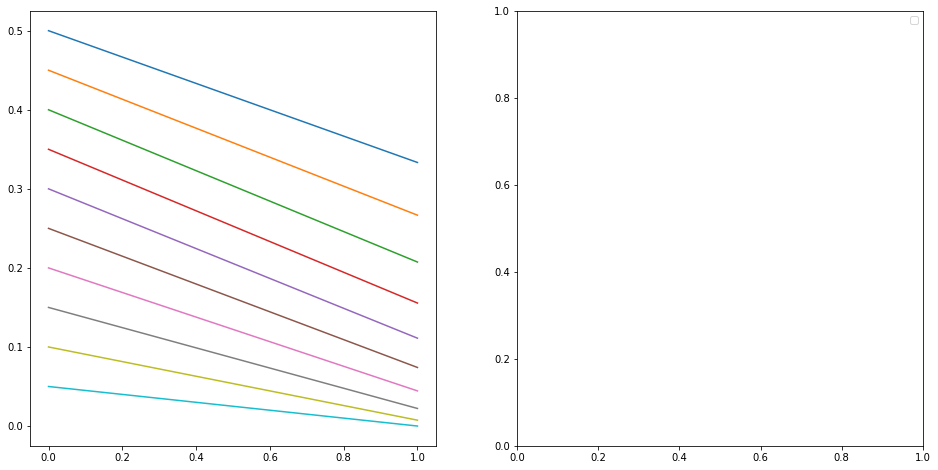

In [26]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
for k in range(int(GD/2)):
    ax[0].plot(K,T_WFP(GD,nGD,k,K,TRI/2), label = 'GD=%d'%k)
for l in range(nGD):
    ax[1].plot(K,T_ANC(GD,nGD,l,K,TRI/2), linestyle = 'dashed', label = 'nGD=%d'%l)
ax[1].legend()

In [12]:
GBN1.triangles['1']

[[0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 191],
 [0, 192],
 [0, 193],
 [0, 194],
 [0, 195],
 [0, 196],
 [0, 197],
 [0, 198],
 [0, 199],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11],
 [2, 12],
 [2, 192],
 [2, 193],
 [2, 194],
 [2, 195],
 [2, 196],
 [2, 197],
 [2, 198],
 [2, 199],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [3, 11],
 [3, 12],
 [3, 162],
 [3, 193],
 [3, 194],
 [3, 195],
 [3, 196],
 [3, 197],
 [3, 198],
 [3, 199],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [4, 11],
 [4, 12],
 [4, 21],
 [4, 194],
 [4, 195],
 [4, 196],
 [4, 197],
 [4, 198],
 [4, 199],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [5, 11],
 [5, 12],
 [5, 195],
 [5, 196],
 [5, 197],
 [5, 198],
 [5, 199],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [6, 11],
 [6, 12],
 [6, 196],
 [6, 197],
 [6, 198],
 [6, 199],
 [7, 8],
 [7, 9],
 [7, 10],
 [7, 11],
 [7, 12],
 [7, 197],
 [7, 198],
 [7, 199],
 [8, 9],
 [8

In [3]:
size = 200
GD = 10
nGD = 0
topology = 'Ring'

TIME = 200
trials = 1
C = 1000
#K=0.5

memory = TIME
rest = 0

CPU times: user 19.5 s, sys: 283 ms, total: 19.8 s
Wall time: 21.1 s


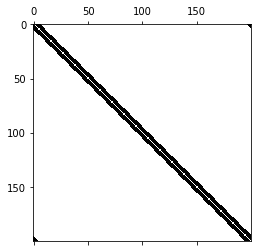

In [4]:
%%time
GBN1 = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, nongeometric_degree = nGD, manifold = topology)
Adjacency = GBN1.A
plt.spy(Adjacency)

In [9]:
%%time
threshold1 = 0.2
neurons1 = [neuron.neuron(i, memory = memory, rest = rest, threshold = threshold1) for i in range(size)]

GBN1.get_neurons(neurons1)

CPU times: user 387 µs, sys: 14 µs, total: 401 µs
Wall time: 422 µs


CPU times: user 1min 7s, sys: 137 ms, total: 1min 7s
Wall time: 1min 8s


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3b8a3af10>)

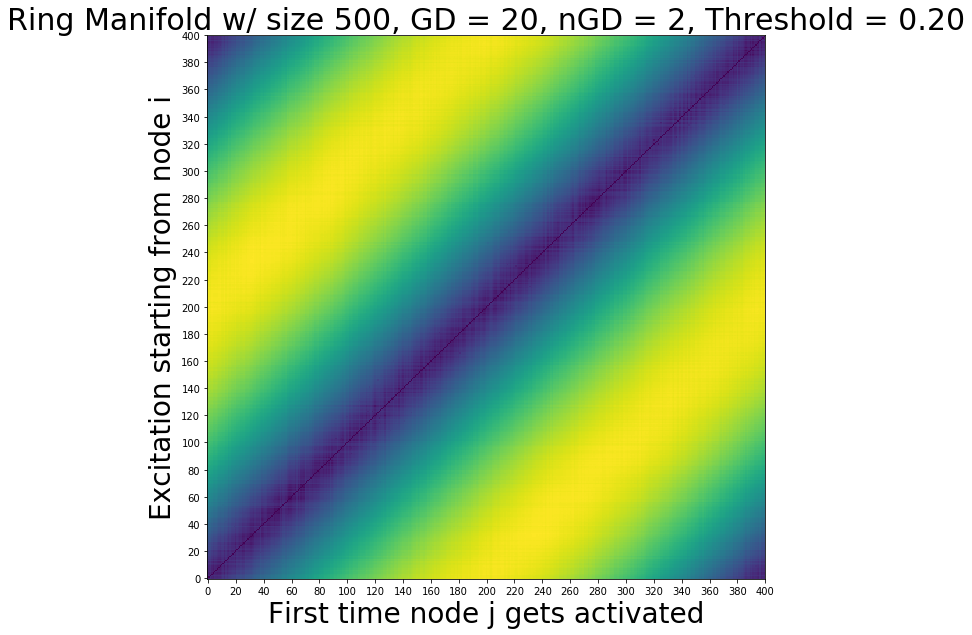

In [10]:
%%time
FAT1, QS1 = GBN1.make_distance_matrix(TIME, C, trials, K)
spy_distance_matrix(FAT1,size,nGD, threshold1)

In [13]:
from itertools import combinations


cliques = [{2,3},{1,2},{0,3}]
for u,v in combinations(cliques,2):
    print(type(u),v, type(u^v))

<class 'set'> {1, 2} <class 'set'>
<class 'set'> {0, 3} <class 'set'>
<class 'set'> {0, 3} <class 'set'>
